Let's analyze a wastewater treatment plant "Melbourne eastern wastewater treatment plant"
https://www.researchgate.net/profile/Faramarz-Bagherzadeh-2 and understand how to best predict energy consumption.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the dataset
df = pd.read_csv("Data-Melbourne_F_fixed.csv")

In [3]:
df.head()

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [4]:
df.drop(df.columns[0], axis = 1, inplace = True)

In [5]:
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [6]:
# Check for missing values
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

Let's first calculate the efficiency each day.

In [7]:
df['Efficiency'] = (df['Average Inflow']- df['Average Outflow'])/(df['Average Inflow'])

In [8]:
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Efficiency
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0,-0.135960
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0,0.008443
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0,0.092093
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0,0.127013
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0,0.231154


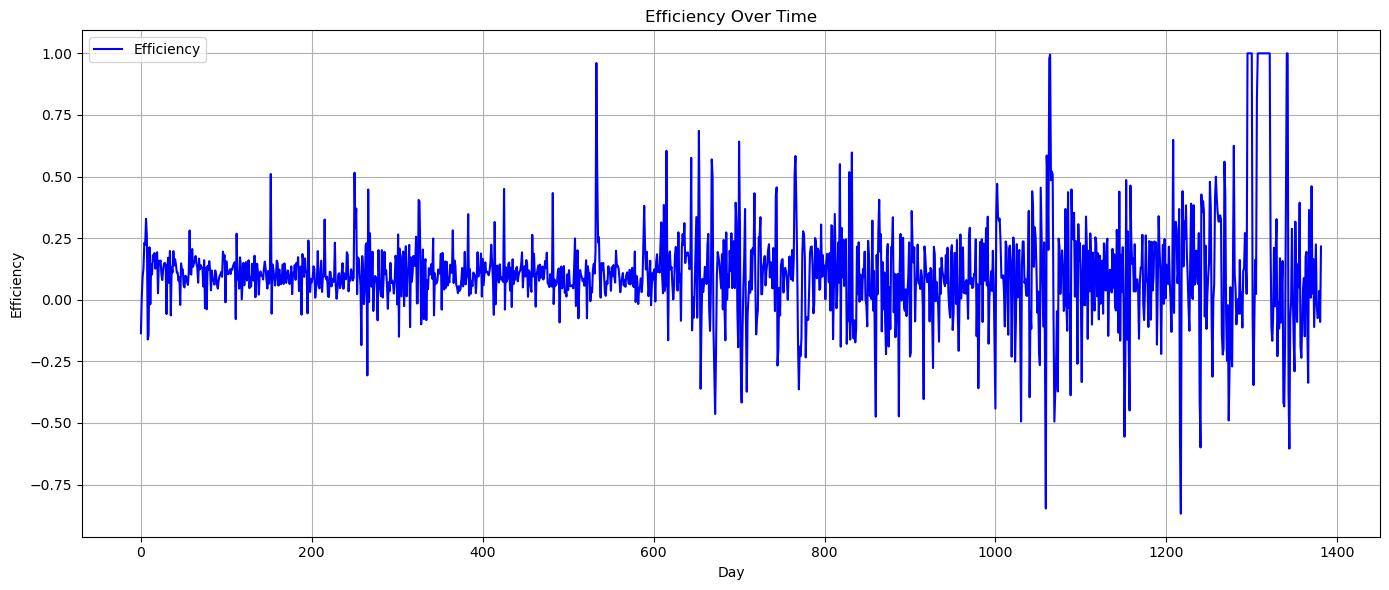

In [9]:
import matplotlib.pyplot as plt

# Plotting Efficiency over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Efficiency'], label='Efficiency', color='blue')
plt.title('Efficiency Over Time')
plt.xlabel('Day')
plt.ylabel('Efficiency')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Average efficiency by year
avg_efficiency_year = df.groupby('Year')['Efficiency'].mean()

# Average efficiency by month
avg_efficiency_month = df.groupby('Month')['Efficiency'].mean()

# Average efficiency by day
avg_efficiency_day = df.groupby('Day')['Efficiency'].mean()


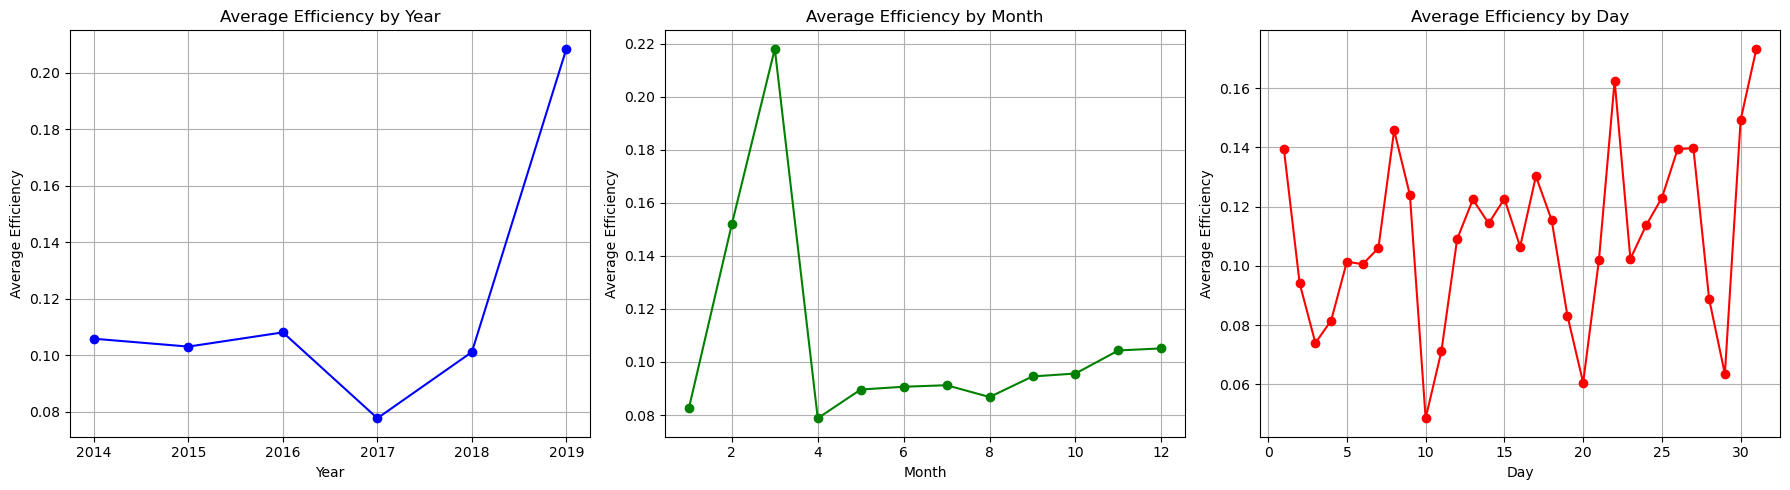

In [11]:
# Create a figure for the plots
plt.figure(figsize=(18, 5))

# Plot average efficiency by year
plt.subplot(1, 3, 1)
plt.plot(avg_efficiency_year.index, avg_efficiency_year, marker='o', color='blue')
plt.title('Average Efficiency by Year')
plt.xlabel('Year')
plt.ylabel('Average Efficiency')
plt.grid()

# Plot average efficiency by month
plt.subplot(1, 3, 2)
plt.plot(avg_efficiency_month.index, avg_efficiency_month, marker='o', color='green')
plt.title('Average Efficiency by Month')
plt.xlabel('Month')
plt.ylabel('Average Efficiency')
plt.grid()

# Plot average efficiency by day
plt.subplot(1, 3, 3)
plt.plot(avg_efficiency_day.index, avg_efficiency_day, marker='o', color='red')
plt.title('Average Efficiency by Day')
plt.xlabel('Day')
plt.ylabel('Average Efficiency')
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


The 2019 spike is misleading:

In [12]:
# List of unique years in the DataFrame
years = df['Year'].unique()

# Loop through each year and print the shape
for year in years:
    year_data_shape = df[df['Year'] == year].shape[0]
    print(f"Year: {year}, datapoints: {year_data_shape}")


Year: 2014.0, datapoints: 245
Year: 2015.0, datapoints: 258
Year: 2016.0, datapoints: 260
Year: 2017.0, datapoints: 253
Year: 2018.0, datapoints: 246
Year: 2019.0, datapoints: 120


So in fact, because we don't have complete data for this year,We'll have to drop this year.

In [13]:
# Dropping data for the year 2019
df = df[df['Year'] != 2019.0]

In [14]:
# Redo previous calculations accounting for 2019 being dropped

# Average efficiency by year
avg_efficiency_year = df.groupby('Year')['Efficiency'].mean()

# Average efficiency by month
avg_efficiency_month = df.groupby('Month')['Efficiency'].mean()

# Average efficiency by day
avg_efficiency_day = df.groupby('Day')['Efficiency'].mean()


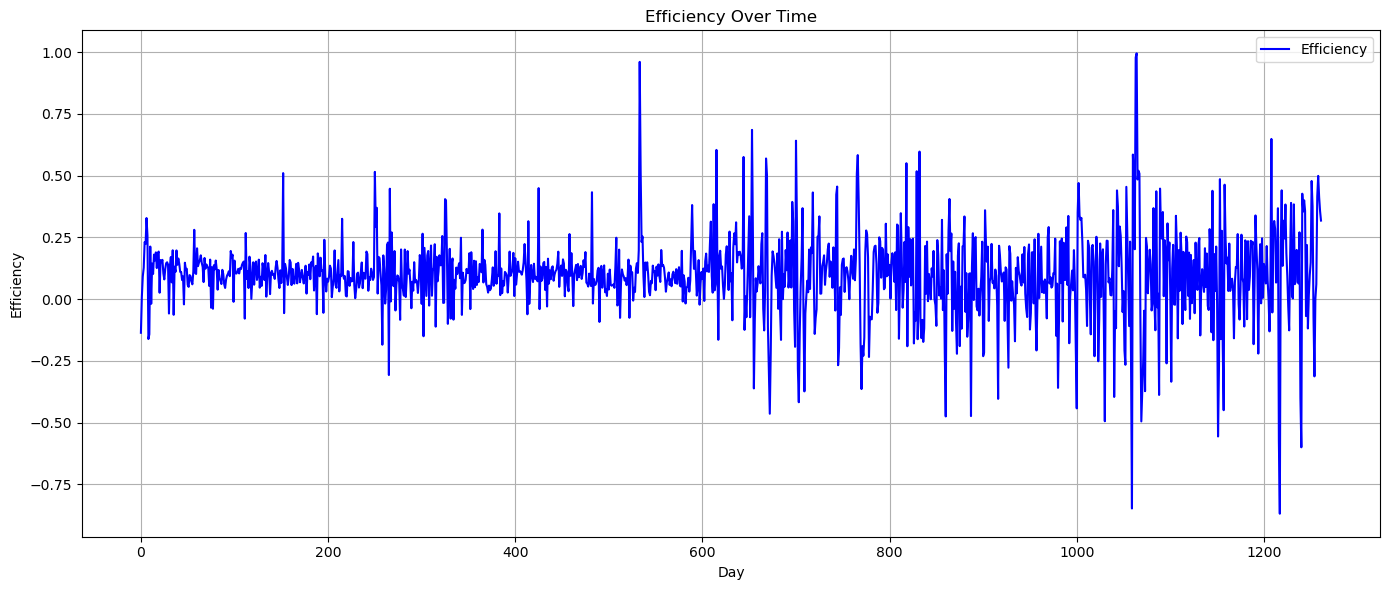

In [15]:
# Plotting Efficiency over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Efficiency'], label='Efficiency', color='blue')
plt.title('Efficiency Over Time')
plt.xlabel('Day')
plt.ylabel('Efficiency')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Over time, efficiency has gotten less stable with increased variance.

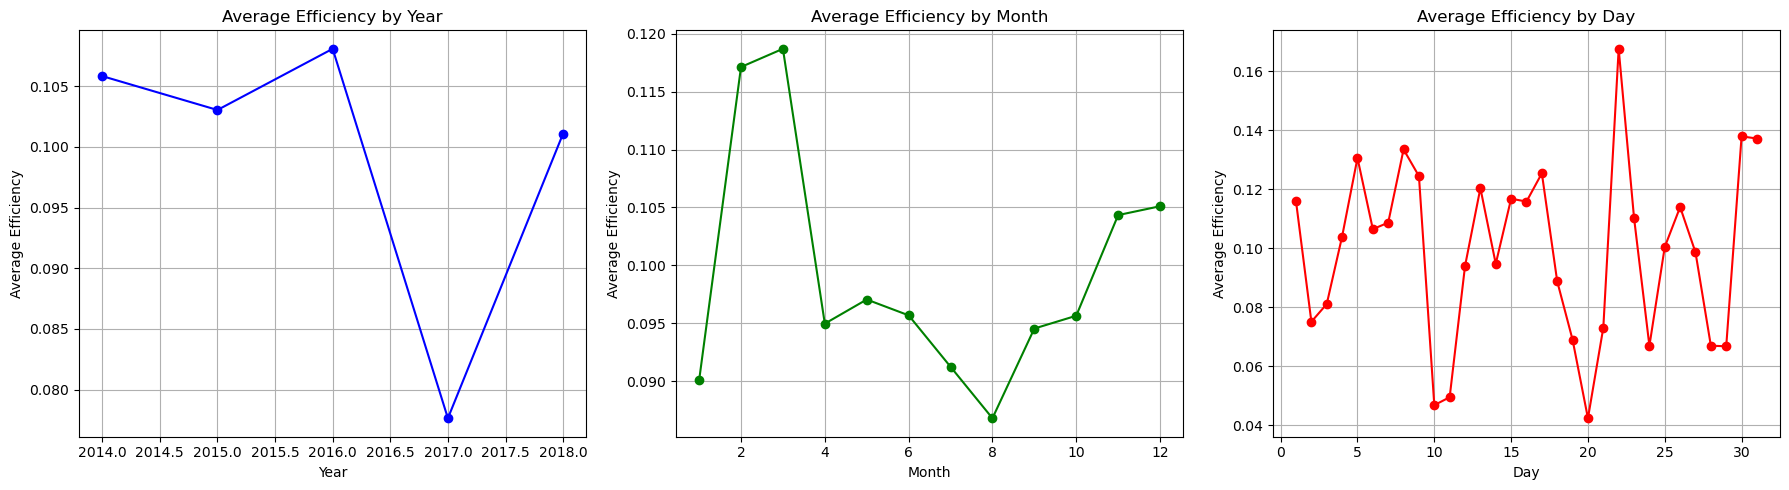

In [16]:
# Create a figure for the plots
plt.figure(figsize=(18, 5))

# Plot average efficiency by year
plt.subplot(1, 3, 1)
plt.plot(avg_efficiency_year.index, avg_efficiency_year, marker='o', color='blue')
plt.title('Average Efficiency by Year')
plt.xlabel('Year')
plt.ylabel('Average Efficiency')
plt.grid()

# Plot average efficiency by month
plt.subplot(1, 3, 2)
plt.plot(avg_efficiency_month.index, avg_efficiency_month, marker='o', color='green')
plt.title('Average Efficiency by Month')
plt.xlabel('Month')
plt.ylabel('Average Efficiency')
plt.grid()

# Plot average efficiency by day
plt.subplot(1, 3, 3)
plt.plot(avg_efficiency_day.index, avg_efficiency_day, marker='o', color='red')
plt.title('Average Efficiency by Day')
plt.xlabel('Day')
plt.ylabel('Average Efficiency')
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

We can see that efficiency on average was <b>worst</b> in 2017, and typicaly in January, and nearing October. Efficiency was <b>highest</b> on average in 2016, from February to March. Little correlation can be seen on a day by day basis.

Let's get a quick glance and see if any other attribute correlates with efficiency the most.

/Users/connorsteele/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


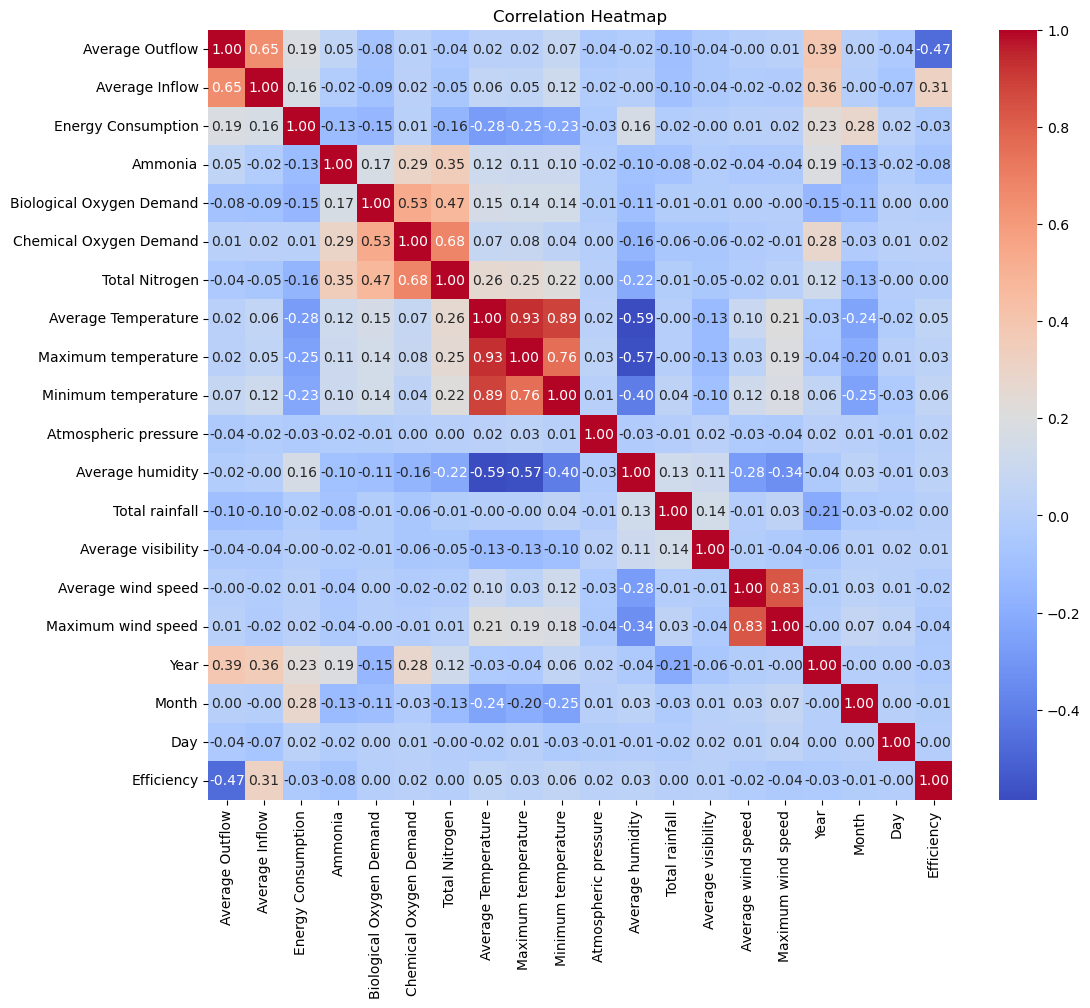

In [17]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Let's do some more visualizations to see if we can spot any other interesting trends.

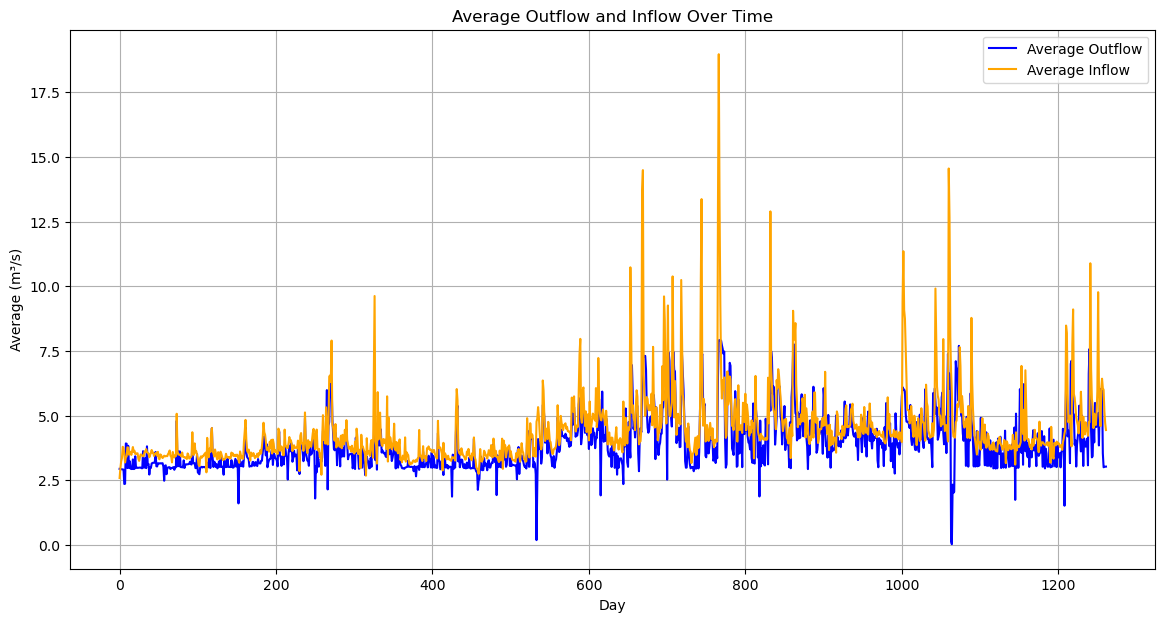

In [18]:
# Plot Average Outflow and Inflow over time
plt.figure(figsize=(14, 7))
plt.plot(df['Average Outflow'], label='Average Outflow', color='blue')
plt.plot(df['Average Inflow'], label='Average Inflow', color='orange')
plt.title('Average Outflow and Inflow Over Time')
plt.xlabel('Day')
plt.ylabel('Average (m³/s)')
plt.legend()
plt.grid()
plt.show()


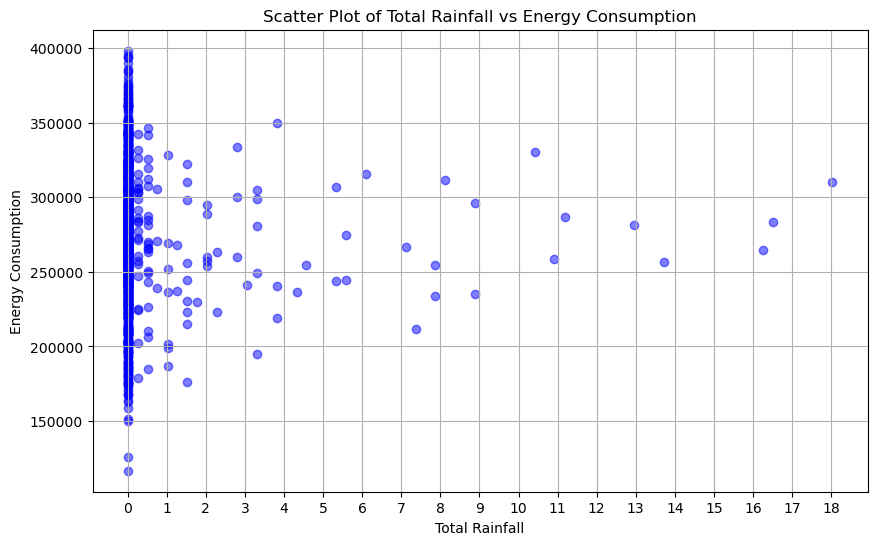

In [19]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total rainfall'], df['Energy Consumption'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Total Rainfall vs Energy Consumption')
plt.xlabel('Total Rainfall')
plt.ylabel('Energy Consumption')

# Increase the number of ticks on the x-axis
plt.xticks(ticks=range(0, int(df['Total rainfall'].max()) + 1, 1))  # Adjust step size as needed

plt.grid(True)
plt.show()


An interesting observation from above is that during dry season, the energy consumption is likely to reach up to the 400000 range, but with some rainfall, the energy consumption ceiling tends to lower.

Let's fit a multiple regression model to predict energy consumption.

In [20]:
# For convenience
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Efficiency
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0,-0.135960
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0,0.008443
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0,0.092093
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0,0.127013
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0,0.231154


In [21]:
# One-hot encode the 'Month' column, keeping each month as a separate column
df = pd.get_dummies(df, columns=['Month'], drop_first=False)

# Rename the one-hot encoded columns to month names
month_mapping = {
    'Month_1.0': 'January', 
    'Month_2.0': 'February', 
    'Month_3.0': 'March', 
    'Month_4.0': 'April', 
    'Month_5.0': 'May', 
    'Month_6.0': 'June', 
    'Month_7.0': 'July', 
    'Month_8.0': 'August', 
    'Month_9.0': 'September', 
    'Month_10.0': 'October', 
    'Month_11.0': 'November', 
    'Month_12.0': 'December'
}

# Rename the columns based on the month_mapping
df.rename(columns=month_mapping, inplace=True)
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,...,March,April,May,June,July,August,September,October,November,December
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,...,False,False,False,False,False,False,False,False,False,False
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,...,False,False,False,False,False,False,False,False,False,False
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,...,False,False,False,False,False,False,False,False,False,False
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,...,False,False,False,False,False,False,False,False,False,False
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Compute the correlation matrix here for convenience
correlation_matrix = df.corr()

# Print the correlation values for 'Energy Consumption'
energy_consumption_corr = correlation_matrix['Energy Consumption'].sort_values(ascending=False)

# Display the correlations
print(energy_consumption_corr)


Energy Consumption          1.000000
Year                        0.231340
August                      0.199715
Average Outflow             0.188066
Average Inflow              0.164023
Average humidity            0.162207
May                         0.116056
September                   0.098365
October                     0.089932
July                        0.031237
Day                         0.024509
December                    0.020204
Maximum wind speed          0.015628
November                    0.014019
Average wind speed          0.011692
Chemical Oxygen Demand      0.010391
Average visibility         -0.001002
June                       -0.012811
Total rainfall             -0.015695
Atmospheric pressure       -0.028736
Efficiency                 -0.034914
April                      -0.063260
March                      -0.079324
Ammonia                    -0.126932
Biological Oxygen Demand   -0.146559
Total Nitrogen             -0.162867
February                   -0.166551
M

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the feature variables (X) and the target variable (y)
X = df.drop(columns=['Energy Consumption', 'Year']) # Year doesn't make sense, since we aren't going back in time!
y = df['Energy Consumption']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)

# Output the R-squared value
print(f'R-squared value: {r_squared:.2f}')



R-squared value: 0.20


Not good. Perhaps we overfit. Let's decrease the number of features.

In [24]:
# Define the features based on correlation analysis
features = ['August', 'May', 'Average Outflow', 'Average Inflow', 'Average humidity', 'Average Temperature', 'Biological Oxygen Demand']


X = df[features]

# Define the target variable
y = df['Energy Consumption']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)

# Output the R-squared value
print(f'R-squared value: {r_squared:.2f}')


R-squared value: 0.13


What about a decision tree?

Mean Squared Error: 1554061707.32
R-squared: 0.29


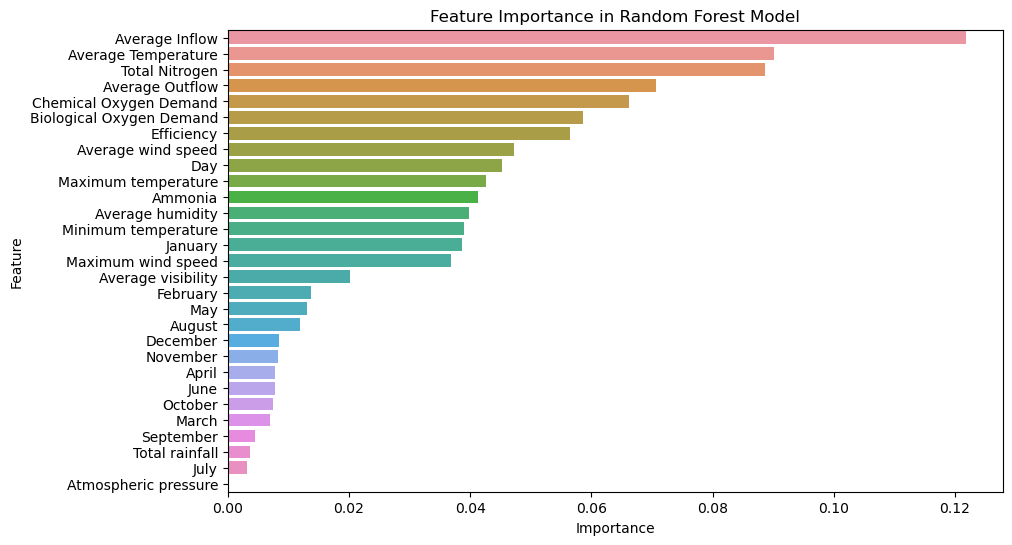

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and features
X = df.drop(columns=['Energy Consumption', 'Year'])  # Independent variables
y = df['Energy Consumption']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize Feature Importance
importance = rf_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()


We see that in predicting energy consumption, average inflow, average temperature and total nitrogen are key. What about gradient boosting?

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor - Mean Squared Error: {mse_gbr:.2f}')
print(f'Gradient Boosting Regressor - R-squared: {r2_gbr:.2f}')


Gradient Boosting Regressor - Mean Squared Error: 1566075645.88
Gradient Boosting Regressor - R-squared: 0.28


Still not getting a higher R-squared value. Let's conduct a sensitivity analysis using the random forest model.

In [31]:
# Drop the 'Energy Consumption', 'Year', and month columns
month_columns = ['January', 'February', 'March', 'April', 'May', 
                 'June', 'July', 'August', 'September', 
                 'October', 'November', 'December']
X = df.drop(columns=['Energy Consumption', 'Year', 'Day'] + month_columns)
y = df['Energy Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get baseline predictions
baseline_predictions = rf_model.predict(X_test)

# Sensitivity Analysis
sensitivity_results = {}

# Define the percentage change
percent_changes = [0.9, 1.0, 1.1]  # 10% decrease, 100% (no change), 10% increase

for feature in X.columns:
    # Store predictions for each variation
    predictions = []

    for change in percent_changes:
        # Create a copy of the test set
        X_test_variation = X_test.copy()
        
        # Apply the change to the selected feature
        X_test_variation[feature] = X_test_variation[feature] * change
        
        # Get predictions for the varied feature
        pred = rf_model.predict(X_test_variation)
        predictions.append(pred)
    
    # Calculate the mean predictions for each variation
    sensitivity_results[feature] = {
        '10% Decrease': np.mean(predictions[0]),
        'Original': np.mean(baseline_predictions),
        '10% Increase': np.mean(predictions[2])
    }

# Convert results to DataFrame for better visualization
sensitivity_df = pd.DataFrame(sensitivity_results).T
sensitivity_df.columns = ['10% Decrease', 'Original', '10% Increase']
sensitivity_df['Predicted Energy Consumption Change (%)'] = (
    (sensitivity_df['10% Increase'] - sensitivity_df['10% Decrease']) / sensitivity_df['Original']
) * 100

sensitivity_df.sort_values("Predicted Energy Consumption Change (%)", ascending=False)



,10% Decrease,Original,10% Increase,Predicted Energy Consumption Change (%)
Average Inflow,270720.456087,276008.295296,278965.358933,2.987194
Chemical Oxygen Demand,271818.756482,276008.295296,279467.932767,2.771357
Average Outflow,275165.557708,276008.295296,277723.611818,0.926803
Maximum wind speed,275470.617036,276008.295296,276405.611186,0.338756
Average humidity,275560.814269,276008.295296,276397.124427,0.303002
Average wind speed,275834.674545,276008.295296,276019.897391,0.067108
Maximum temperature,275831.167352,276008.295296,275984.068458,0.055397
Atmospheric pressure,276008.295296,276008.295296,276008.295296,0.000000
Total rainfall,276011.152846,276008.295296,276008.803399,-0.000851
Efficiency,276025.364822,276008.295296,275992.543755,-0.011891


<b>Summary:</b> Wastewater treatment plants can be complex when trying to make them more efficient and use less energy. It's been shown that there are many factors that contribute to this, and more data is needed to predict energy efficiency. I'm eager to conduct future analyses for this project and hope to find datasets that have details about each step in a treatment plant. Average inflow, chemical oxygen demand, average temperature, and humdity appear to affect the energy consumption of this particular treatment plant most, but of course, as shown, there are limitaions. The low R-squared values of all models demonstrate that further analysis should be done, but I hope this small project paints a better picture as to how all these variables affect efficiency and energy consumption, and where future research should be done in designing more efficient wastewater treatment plants. If you made it this far, I thank you!